#### Data Overview and Loading

In [1]:
import pandas as pd

dim_date = pd.read_excel(r"C:\Users\hp\Downloads\Hospitality data\Dataset\dim_date.xlsx")
dim_hotels = pd.read_csv(r"C:\Users\hp\Downloads\Hospitality data\Dataset\dim_hotels.csv")
dim_rooms = pd.read_csv(r"C:\Users\hp\Downloads\Hospitality data\Dataset\dim_rooms.csv")
fact_aggregated_bookings = pd.read_csv(r"C:\Users\hp\Downloads\Hospitality data\Dataset\fact_aggregated_bookings.csv")
fact_bookings = pd.read_csv(r"C:\Users\hp\Downloads\Hospitality data\Dataset\fact_bookings.csv")
metrics_list = pd.read_excel(r"C:\Users\hp\Downloads\Hospitality data\Dataset\metrics_list.xlsx")

In [2]:
print(dim_date.info())
print("\n")
print(dim_hotels.info())
print("\n")
print(dim_rooms.info())
print("\n")
print(fact_aggregated_bookings.info())
print("\n")
print(fact_bookings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     datetime64[ns]
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](2), object(2)
memory usage: 3.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  D

#### Data Transformation and Merging

In [3]:
fact_bookings['check_in_date'] = pd.to_datetime(fact_bookings['check_in_date'])

merged_data = pd.merge(fact_bookings, dim_date, left_on="check_in_date", right_on="date", how="left")
merged_data = pd.merge(merged_data, dim_hotels, on="property_id", how="left")
merged_data = pd.merge(merged_data, dim_rooms, left_on="room_category", right_on="room_id", how="left")


In [4]:
merged_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,date,mmm yy,week no,day_type,property_name,category,city,room_id,room_class
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,...,10010,2022-05-01,2022-05-01,W 19,weekend,Atliq Grands,Luxury,Delhi,RT1,Standard
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,...,3640,2022-05-01,2022-05-01,W 19,weekend,Atliq Grands,Luxury,Delhi,RT1,Standard
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,...,9100,2022-05-01,2022-05-01,W 19,weekend,Atliq Grands,Luxury,Delhi,RT1,Standard
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,...,3640,2022-05-01,2022-05-01,W 19,weekend,Atliq Grands,Luxury,Delhi,RT1,Standard
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,...,10920,2022-05-01,2022-05-01,W 19,weekend,Atliq Grands,Luxury,Delhi,RT1,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,...,32300,2022-07-31,2022-07-01,W 32,weekend,Atliq Seasons,Business,Mumbai,RT4,Presidential
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,...,38760,2022-07-31,2022-07-01,W 32,weekend,Atliq Seasons,Business,Mumbai,RT4,Presidential
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,...,12920,2022-07-31,2022-07-01,W 32,weekend,Atliq Seasons,Business,Mumbai,RT4,Presidential
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,...,32300,2022-07-31,2022-07-01,W 32,weekend,Atliq Seasons,Business,Mumbai,RT4,Presidential


#### Handling Missing Values and Key Metrics Calculation 

In [5]:
merged_data['ratings_given'].fillna(0, inplace=True)
merged_data = merged_data.dropna(subset=['revenue_generated', 'ratings_given', 'no_guests'])


In [6]:
total_bookings = merged_data['booking_id'].count()
total_successful_bookings = merged_data[merged_data['booking_status'] == "Checked Out"]['booking_id'].count()

average_rating = merged_data['ratings_given'].mean()
total_capacity = merged_data['room_category'].nunique()
total_cancelled_bookings = merged_data[merged_data['booking_status'] == "Cancelled"]['booking_id'].count()
cancellation_rate = (total_cancelled_bookings / total_bookings) * 100

print(f"Total Bookings: {total_bookings}")
print(f"Total Successful Bookings: {total_successful_bookings}")
print(f"Average Rating: {average_rating}")
print(f"Total Capacity: {total_capacity}")
print(f"Total Cancelled Bookings: {total_cancelled_bookings}")
print(f"Cancellation Rate: {cancellation_rate}")

Total Bookings: 134590
Total Successful Bookings: 94411
Average Rating: 1.5241548406270897
Total Capacity: 4
Total Cancelled Bookings: 33420
Cancellation Rate: 24.830968125417936


#### Data Distributions and Relationships 

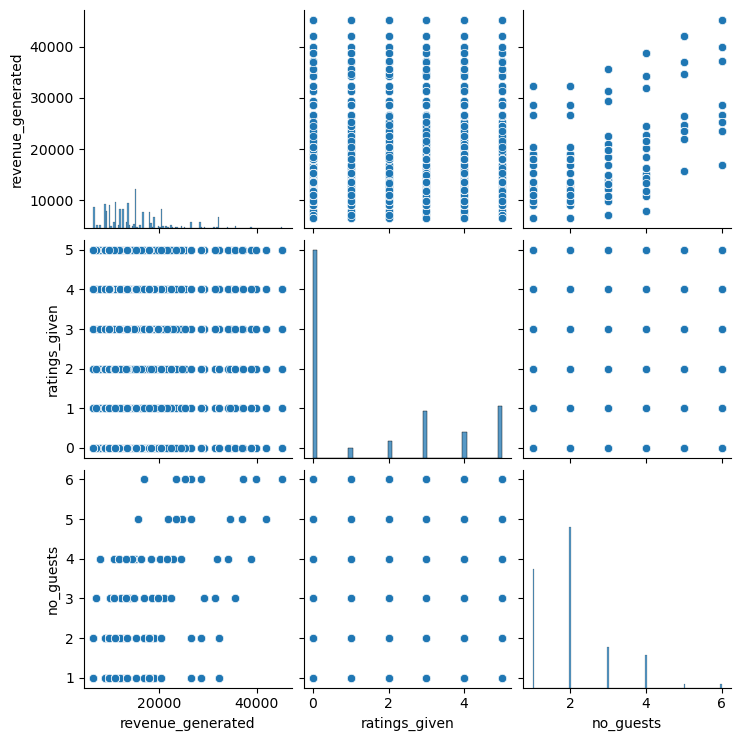

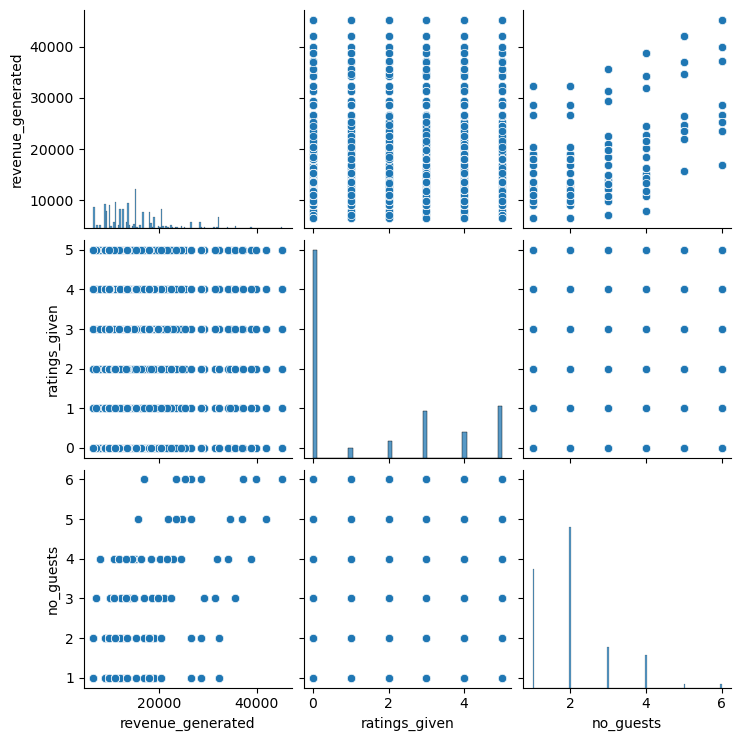

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(merged_data[['revenue_generated', 'ratings_given', 'no_guests', 'week no']])
plt.show()

#### Additional Metrics Calculation and Plots 

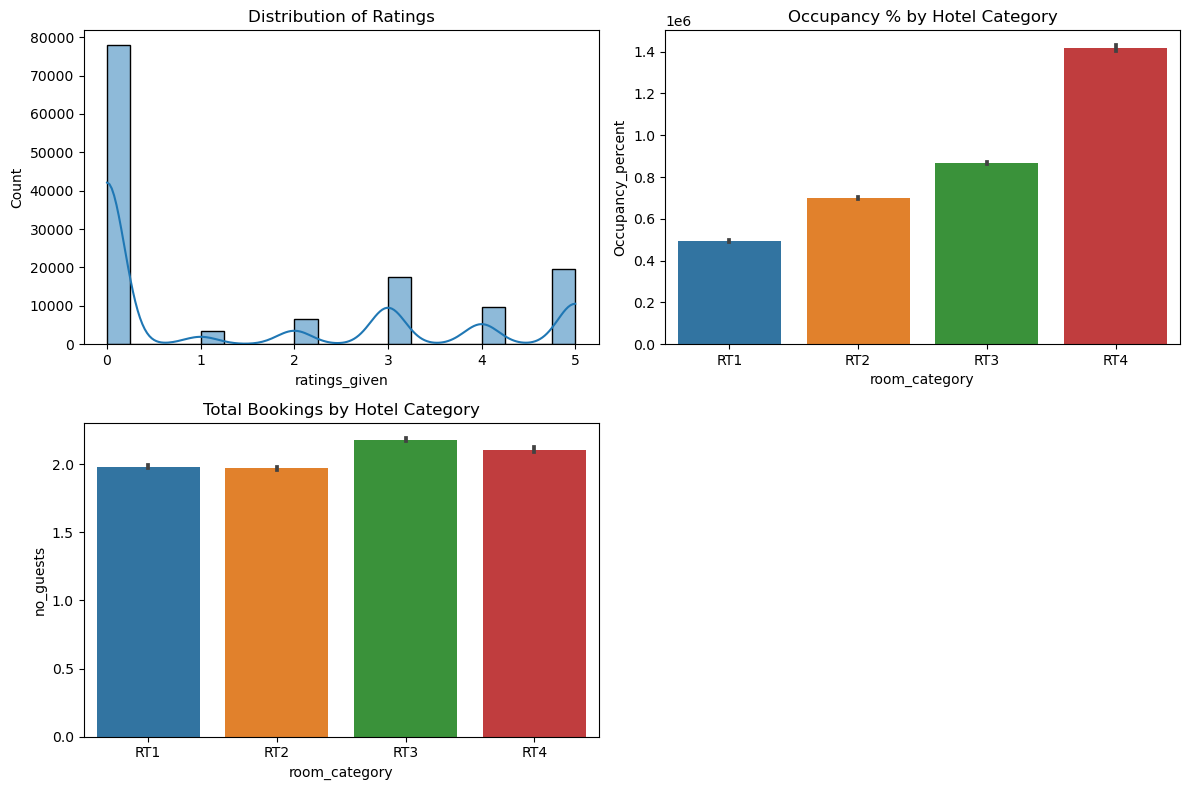

In [11]:
merged_data['Occupancy_percent'] = (merged_data['revenue_realized'] / merged_data['no_guests']) * 100
merged_data['Cancellation Rate'] = (merged_data['booking_status'] == "Cancelled").mean() * 100

# Plot 1: Distribution of Ratings
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(merged_data['ratings_given'], bins=20, kde=True)
plt.title('Distribution of Ratings')

# Plot 2: Occupancy Percentage by Hotel Category
plt.subplot(2, 2, 2)
sns.barplot(x='room_category', y='Occupancy_percent', data=merged_data)
plt.title('Occupancy % by Hotel Category')

# Plot 3: Bar plot of Total Bookings
plt.subplot(2, 2, 3)
sns.barplot(x='room_category', y='no_guests', data=merged_data)
plt.title('Total Bookings by Hotel Category')

plt.tight_layout()
plt.show()


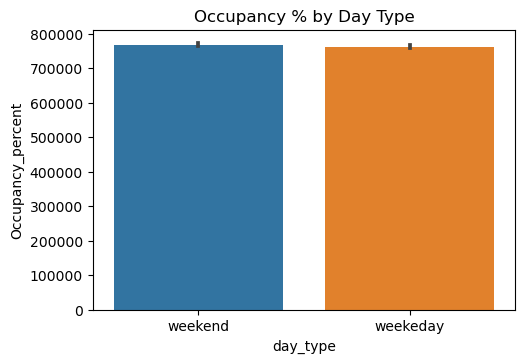

<Figure size 1200x800 with 0 Axes>

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 4)
sns.barplot(x='day_type', y='Occupancy_percent', data=merged_data)
plt.title('Occupancy % by Day Type')
plt.show()

plt.figure(figsize=(12, 8))

#### Occupancy Trends and Additional Plots 

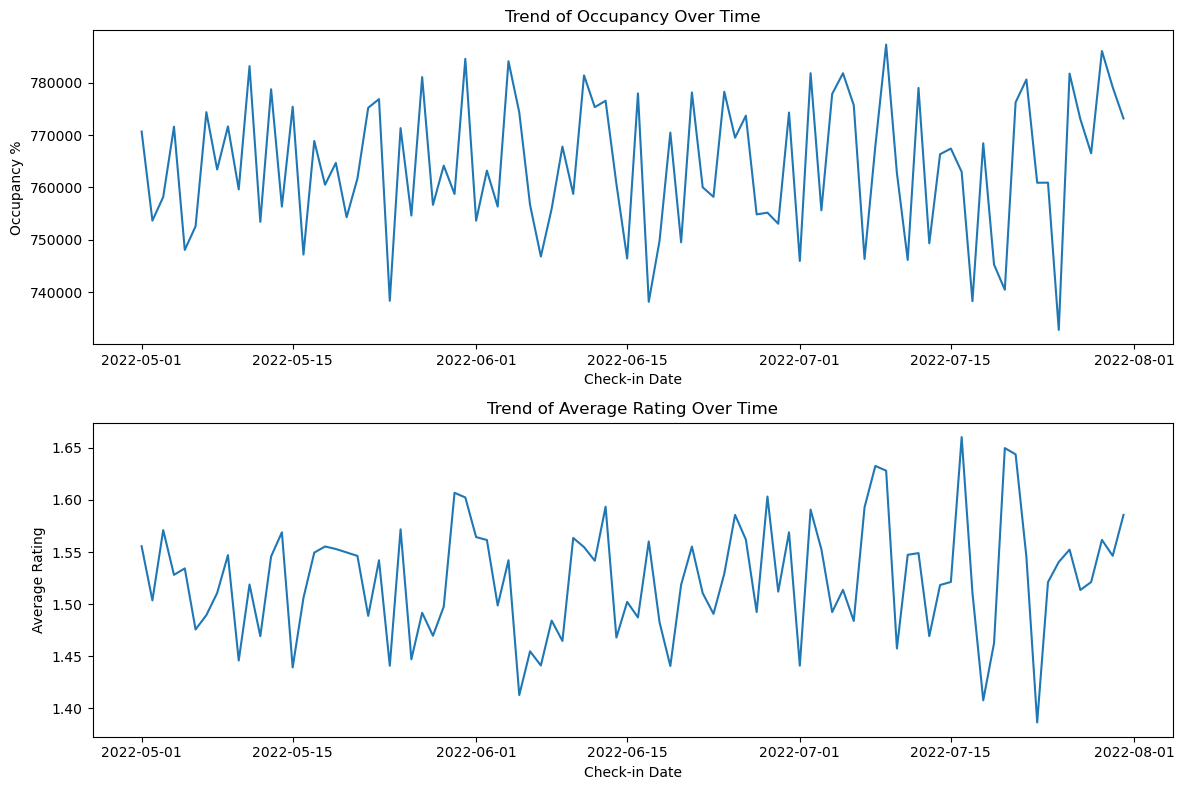

In [13]:
# Trend 1: Occupancy over time
plt.subplot(2, 1, 1)
sns.lineplot(x='check_in_date', y='Occupancy_percent', data=merged_data, ci=None)
plt.title('Trend of Occupancy Over Time')
plt.xlabel('Check-in Date')
plt.ylabel('Occupancy %')

# Trend 2: Average Rating over time
plt.subplot(2, 1, 2)
sns.lineplot(x='check_in_date', y='ratings_given', data=merged_data, ci=None)
plt.title('Trend of Average Rating Over Time')
plt.xlabel('Check-in Date')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

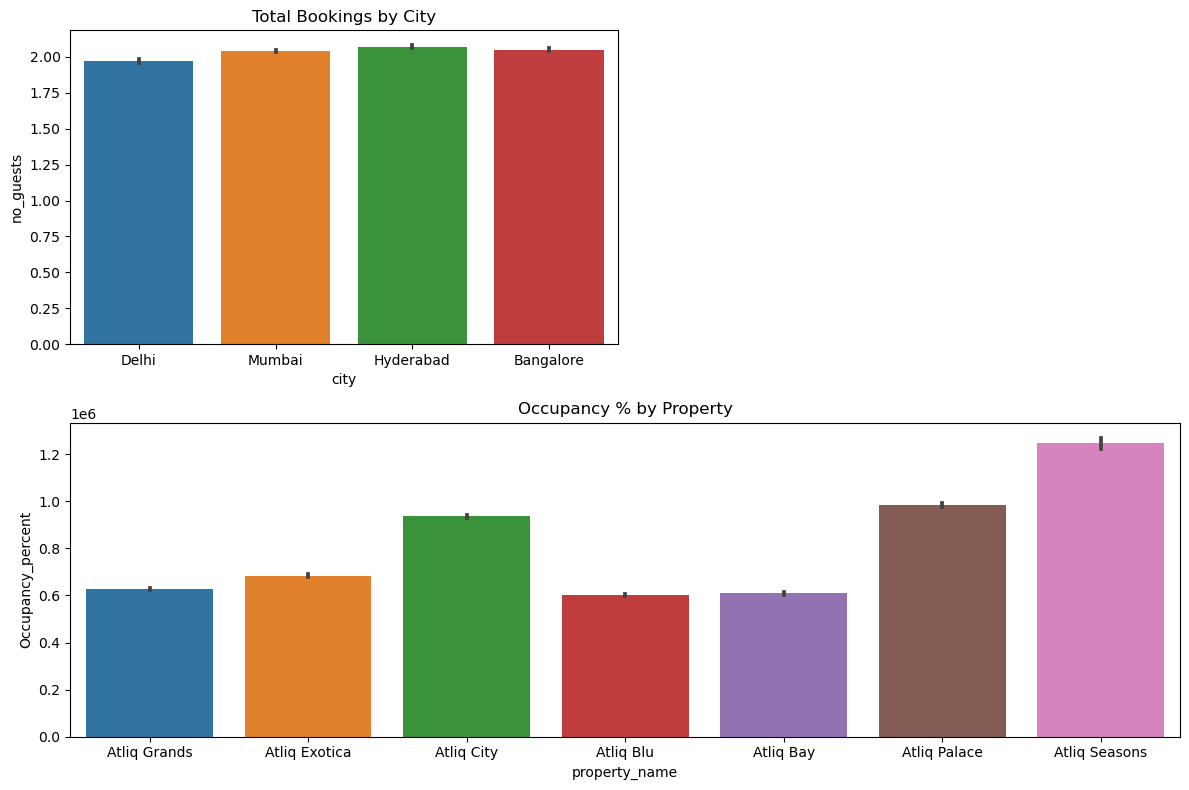

In [14]:
# Plot 4: Bar plot of Total Bookings by City
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x='city', y='no_guests', data=merged_data)
plt.title('Total Bookings by City')

# Plot 5: Occupancy Percentage by Property
plt.subplot(2, 1, 2)
sns.barplot(x='property_name', y='Occupancy_percent', data=merged_data)
plt.title('Occupancy % by Property')

plt.tight_layout()
plt.show()

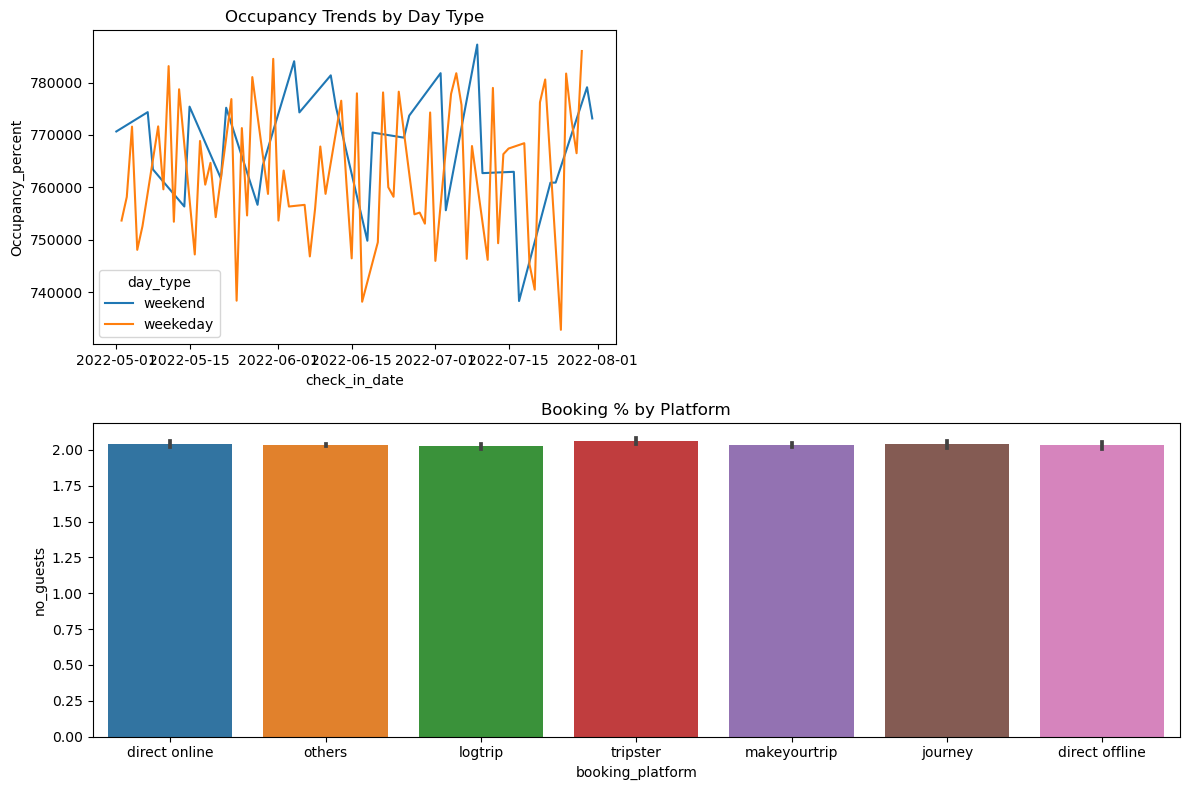

In [15]:
# Plot 6: Trends by day type
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.lineplot(x='check_in_date', y='Occupancy_percent', hue='day_type', data=merged_data, ci=None)
plt.title('Occupancy Trends by Day Type')

# Plot 7: Booking % by platform
plt.subplot(2, 1, 2)
sns.barplot(x='booking_platform', y='no_guests', data=merged_data)
plt.title('Booking % by Platform')

plt.tight_layout()
plt.show()